# Rozpoznanie krzywej na obrazie i oszacowanie krzywej na podstawie oszacowanych punktów

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PIL import Image, ImageDraw
from sklearn.neighbors import KNeighborsRegressor

#### Trzeba zrobić reshape(), żeby można było użyć fit, który potrzebuje macierzy:

In [5]:
X= np.array([1, 2, 3, 4, 8]).reshape(-1, 1)
X.shape

(5, 1)

In [6]:
y = np.array([3, 2, 4, 4, 5])
y.shape

(5,)

- Jupyter wyświetla wynik wykonania ostatniej instrukcji
- plt.show() kumuluje stan matplotlib
- ; rozdziela instrukcje znajdującesię w jednej linii

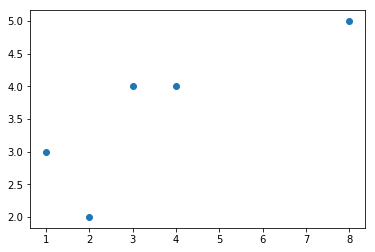

In [7]:
plt.scatter(X, y);

In [8]:
trend = LinearRegression()

##### y może być wielowymiarowy, ale X musi mieć odpowiedni kształt

In [9]:
trend.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### linspace tworzy przestrzeń liniową elementów między start i stop włącznie
##### num definiuje ilość wartości

szhift+m (merge) spaja komórki

In [10]:
X_pred = np.linspace(X.min(), X.max(), num = 10).reshape(-1, 1)
y_pred = trend.predict(X_pred)

##### sum(Array) jest element wise,

##### Array.sum() sumuje całościowo

- all -> iloczyn logiczby 
- any -> suma logiczna

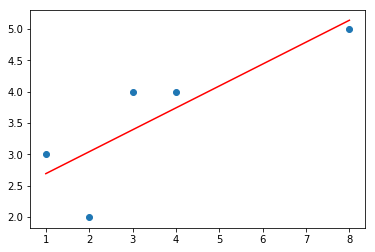

In [11]:
plt.scatter(X, y)
plt.plot(X_pred, y_pred, c='r');

#### coeficience to 'a' w y = ax+b: 

In [12]:
trend.coef_ 

array([0.34931507])

#### punkt przecięcia 'b' w y = ax + b:

In [13]:
trend.intercept_ 

2.3424657534246576

In [14]:
trend.predict([[0]])

array([2.34246575])

In [15]:
image = Image.open('pattern_image.png').convert('L') 

L - konwertuje na 1 kanał

In [16]:
pixels = np.array(image)

In [17]:
pixels.shape  #wysokość, szeokość, RGBalfa

(600, 800)

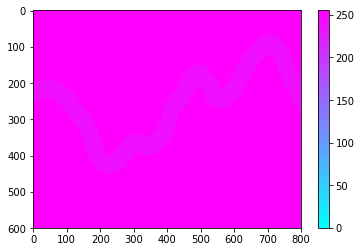

In [18]:
plt.imshow(pixels, interpolation = 'hamming', aspect = 'auto', cmap = 'cool')
plt.colorbar();

###### nonzero zwraca wszystkie współrzędne miejsc z wartościami niezerowymi i zwraca to w np formacie 

#### Szukamy wartości takich żeby wykryło linię

In [19]:
dots = np.nonzero(pixels <128)

In [20]:
y, X = dots
X = X.reshape(-1, 1)

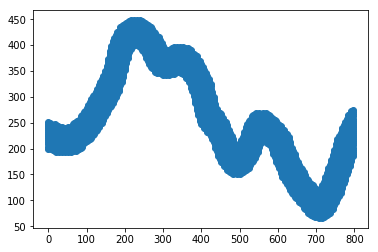

In [21]:
plt.scatter(X, y);

### K Nearest Neighbours Regression:

In [22]:
regressor = KNeighborsRegressor(n_neighbors = 100)

In [23]:
regressor.fit(X, y);

In [24]:
X_pred = np.arange(image.width).reshape(-1, 1)

In [25]:
y_pred = regressor.predict(X_pred)

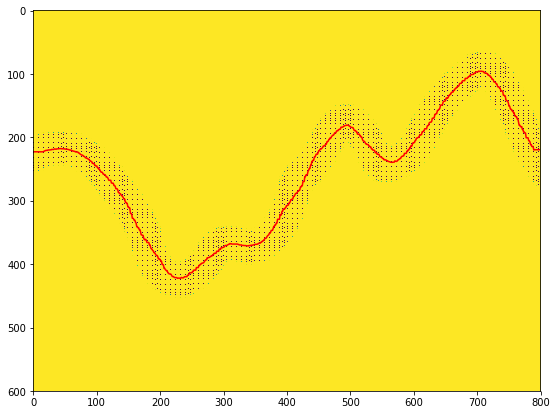

In [26]:
plt.figure(figsize = (10, 7)) #matplodlib otwiera nowy obrazek
plt.imshow(pixels)
plt.plot(X_pred, y_pred, c ='r')

#### Budujemy funkcję która ułatwi szukanie optymalnej ilości n_neighbors:

**kwargs przekazuje dowolną ilość argumentów (o nazwach, które są słowami kluczowymi)

In [27]:
def trace( filename, return_pixels = False, return_image = False, **kwargs):
    image = Image.open('pattern_image.png').convert('L') 
    pixels = np.array(image)
    dots = np.nonzero(pixels < 128)
    y, X = dots
    X = X.reshape(-1, 1)
    regressor = KNeighborsRegressor(**kwargs)

    regressor.fit(X, y);
    X_pred = np.arange(image.width).reshape(-1, 1)
    y_pred = regressor.predict(X_pred)
    if return_pixels:
        return X_pred, y_pred, pixels
    if return_image:
        return X_pred, y_pred, image
    return X_pred, y_pred

In [28]:
def trace_plot(filename, **kwargs):
    X, y, pixels = trace(filename, return_pixels = True, **kwargs)
    plt.figure(figsize = (10, 7)) 
    plt.imshow(pixels)
    plt.plot(X_pred, y_pred, c ='r')
    plt.show()

In [29]:
def trace_image(filename, **kwargs):
    X, y, image = trace(filename, return_image = True, **kwargs)
    image = image.convert('RGB')  # kopia obiektu w formacie RGB
    draw = ImageDraw.Draw(image)
    x_coords = X.ravel() # .ravel() pretwarza talbicę na 1 wymiarową strukturę
    y_coords = y.round().astype(int) 
    draw.line(list(zip(x_coords, y_coords)), fill = (255,0,0))
    return image

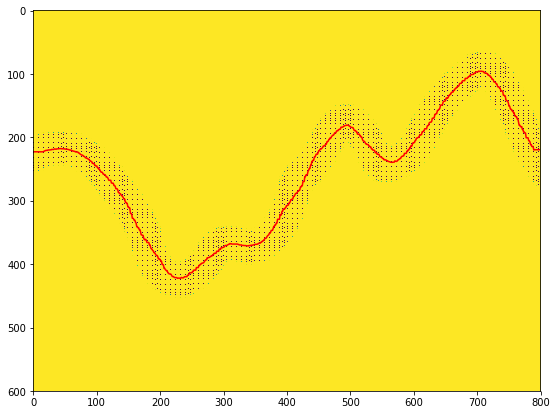

In [30]:
trace_plot('pattern_image.png', n_neighbors = 10)

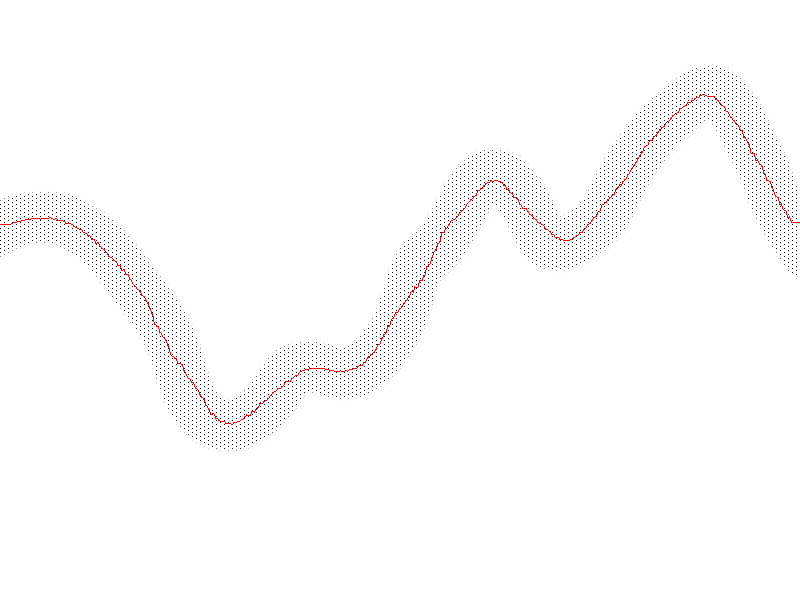

In [31]:
trace_image('pattern_image.png', n_neighbors = 80)

# KONIEC